**Підготовка та аналіз даних. Лабораторна робота №4. ФБ-25 Кучеренко Владислав**

Структури для роботи з великими обсягами даних в Python

Мета: отримати навички роботи із структурами для зберігання в Python (python, numpy, pandas, numpy array, dataframe, timeit)

Основні поняття: numpy масиви, кортежі, списки, фрейми, профілювання.

**Перший рівень**

In [60]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
from datetime import datetime
import timeit as ti

In [61]:
individual_household_electric_power_consumption = fetch_ucirepo(id=235) 
X = individual_household_electric_power_consumption.data.features

c:\Users\vladi\AppData\Local\Programs\Python\Python312\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [62]:
df_data = pd.DataFrame(X)
df_data.to_csv('household_power_consumption.csv', sep=';', index=False)

df_data = pd.read_csv('household_power_consumption.csv', delimiter=';', low_memory=False)
df_data.replace('?', np.nan, inplace=True)
df_data = df_data.dropna()

colums_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
df_data[colums_to_convert] = df_data[colums_to_convert].apply(pd.to_numeric, errors='coerce')

print(df_data.head())

         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  


In [63]:
np_data = np.array(X)

def remove_nan(np_data):
    mask = np.any(np_data == '?', axis=1)
    return np_data[~mask]

np_data = remove_nan(np_data)

np_data[:, 2:9] = np_data[:, 2:9].astype(float)
print(np_data)

[['16/12/2006' '17:24:00' 4.216 ... 0.0 1.0 17.0]
 ['16/12/2006' '17:25:00' 5.36 ... 0.0 1.0 16.0]
 ['16/12/2006' '17:26:00' 5.374 ... 0.0 2.0 17.0]
 ...
 ['26/11/2010' '21:00:00' 0.938 ... 0.0 0.0 0.0]
 ['26/11/2010' '21:01:00' 0.934 ... 0.0 0.0 0.0]
 ['26/11/2010' '21:02:00' 0.932 ... 0.0 0.0 0.0]]


**1. Обрати всі домогосподарства, у яких загальна активна споживана потужність перевищує 5 кВт.**

In [64]:
def df_high_power(df_data):
    high_power = df_data[df_data['Global_active_power'] > 5]
    return high_power[['Date', 'Time', 'Global_active_power']]

def np_high_power(np_data):
    high_power = np_data[np_data[:, 2] > 5]
    return high_power

print("DataFrame:\n", df_high_power(df_data))
print("\nNumpy:\n", np_high_power(np_data))
print('\nDataFrame execution time:', ti.timeit(lambda: df_high_power(df_data), number=1)) 
print('Numpy execution time:', ti.timeit(lambda: np_high_power(np_data), number=1))

DataFrame:
                Date      Time  Global_active_power
1        16/12/2006  17:25:00                5.360
2        16/12/2006  17:26:00                5.374
3        16/12/2006  17:27:00                5.388
11       16/12/2006  17:35:00                5.412
12       16/12/2006  17:36:00                5.224
...             ...       ...                  ...
2069356  22/11/2010  18:40:00                5.408
2069357  22/11/2010  18:41:00                5.528
2071586  24/11/2010  07:50:00                5.172
2071587  24/11/2010  07:51:00                5.750
2072997  25/11/2010  07:21:00                5.074

[17547 rows x 3 columns]

Numpy:
 [['16/12/2006' '17:25:00' 5.36 ... 0.0 1.0 16.0]
 ['16/12/2006' '17:26:00' 5.374 ... 0.0 2.0 17.0]
 ['16/12/2006' '17:27:00' 5.388 ... 0.0 1.0 17.0]
 ...
 ['24/11/2010' '07:50:00' 5.172 ... 0.0 38.0 17.0]
 ['24/11/2010' '07:51:00' 5.75 ... 0.0 39.0 17.0]
 ['25/11/2010' '07:21:00' 5.074 ... 1.0 2.0 18.0]]

DataFrame execution time: 0.004909

**2. Обрати всі домогосподарства, у яких вольтаж перевищую 235 В.**

In [65]:
def df_voltage(df_data):
    df_high_voltage = df_data[df_data['Voltage'] > 235]
    return df_high_voltage[['Date', 'Time', 'Voltage']]

def np_voltage(np_data):
    np_high_voltage = np_data[np_data[:, 4] > 235]
    return np_high_voltage

print("DataFrame:\n", df_voltage(df_data))
print("\nNumpy:\n", np_voltage(np_data))
print('\nDataFrame execution time:', ti.timeit(lambda: df_voltage(df_data), number=1)) 
print('Numpy execution time:', ti.timeit(lambda: np_voltage(np_data), number=1))

DataFrame:
                Date      Time  Voltage
4        16/12/2006  17:28:00   235.68
5        16/12/2006  17:29:00   235.02
6        16/12/2006  17:30:00   235.09
7        16/12/2006  17:31:00   235.22
14       16/12/2006  17:38:00   235.24
...             ...       ...      ...
2075254  26/11/2010  20:58:00   240.43
2075255  26/11/2010  20:59:00   240.00
2075256  26/11/2010  21:00:00   239.82
2075257  26/11/2010  21:01:00   239.70
2075258  26/11/2010  21:02:00   239.55

[1952491 rows x 3 columns]

Numpy:
 [['16/12/2006' '17:28:00' 3.666 ... 0.0 1.0 17.0]
 ['16/12/2006' '17:29:00' 3.52 ... 0.0 2.0 17.0]
 ['16/12/2006' '17:30:00' 3.702 ... 0.0 1.0 17.0]
 ...
 ['26/11/2010' '21:00:00' 0.938 ... 0.0 0.0 0.0]
 ['26/11/2010' '21:01:00' 0.934 ... 0.0 0.0 0.0]
 ['26/11/2010' '21:02:00' 0.932 ... 0.0 0.0 0.0]]

DataFrame execution time: 0.14675480000005336
Numpy execution time: 0.17947429999912856


**3. Обрати всі домогосподарства, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер.**

In [66]:
def df_intensity(df_data):
    average_intensity = df_data[df_data['Global_intensity'].between(19, 20)]
    fridgewasher = average_intensity[average_intensity['Sub_metering_2'] > average_intensity['Sub_metering_3']]
    return fridgewasher[['Date', 'Time', 'Global_intensity', 'Sub_metering_2', 'Sub_metering_3']]

def np_intensity(np_data):
    fridgewasher = np_data [(np_data[:, 5] >= 19) & (np_data[:, 5] <= 20) & (np_data[:, 7] > np_data[:, 8])]
    return fridgewasher

print("DataFrame:\n", df_intensity(df_data))
print("\nNumpy:\n", np_intensity(np_data))
print('\nDataFrame execution time:', ti.timeit(lambda: df_intensity(df_data), number=1))
print('Numpy execution time:', ti.timeit(lambda: np_intensity(np_data), number=1))

DataFrame:
                Date      Time  Global_intensity  Sub_metering_2  \
45       16/12/2006  18:09:00              19.0            37.0   
460      17/12/2006  01:04:00              19.6            13.0   
464      17/12/2006  01:08:00              19.6            27.0   
475      17/12/2006  01:19:00              19.4            36.0   
476      17/12/2006  01:20:00              19.4            35.0   
...             ...       ...               ...             ...   
2071589  24/11/2010  07:53:00              19.8            39.0   
2071590  24/11/2010  07:54:00              19.8            39.0   
2071591  24/11/2010  07:55:00              19.4            40.0   
2071592  24/11/2010  07:56:00              19.0            39.0   
2071593  24/11/2010  07:57:00              19.4            39.0   

         Sub_metering_3  
45                 16.0  
460                 0.0  
464                 0.0  
475                 0.0  
476                 0.0  
...                 ...  
2

**4. Обрати випадковим чином 500000 домогосподарств (без повторів елементів вибірки), для них обчислити середні величини усіх 3-х груп споживання електричної енергії**

In [67]:
def df_random_house(df_data):
    random_df = df_data.sample(n=500000, replace=True) 
    means = random_df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()
    return means

def np_random_house(np_data):
    random_indices = np.random.choice(len(np_data), 500000, replace=True)
    random_house = np_data[random_indices]
    means = np.mean(random_house[:, 6:9], axis=0)
    return means

print("DataFrame:\n", df_random_house(df_data))
print("\nNumpy:\n", np_random_house(np_data))
print('\nDataFrame execution time:', ti.timeit(lambda: df_random_house(df_data), number=1))
print('Numpy execution time:', ti.timeit(lambda: np_random_house(np_data), number=1))

DataFrame:
 Sub_metering_1    1.132508
Sub_metering_2    1.293260
Sub_metering_3    6.464334
dtype: float64

Numpy:
 [1.13232 1.294162 6.48002]

DataFrame execution time: 0.10541059999741265
Numpy execution time: 0.2846046999984537


**5. Обрати ті домогосподарства, які після 18-00 споживають понад 6 кВт за хвилину в середньому, серед відібраних визначити ті, у яких основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення (група 2 є найбільшою), а потім обрати кожен третій результат із першої половини та кожен четвертий результат із другої половини.**

In [68]:
def df_task5(df_data):
    df_data['Time'] = pd.to_datetime(df_data['Time'])
    filtered_df = df_data[(df_data['Time'].dt.time >= pd.to_datetime('18:00:00').time()) & 
                      (df_data['Global_active_power'] > 6) & 
                      ((df_data['Sub_metering_2'] > df_data['Sub_metering_3']) & 
                       (df_data['Sub_metering_2'] > df_data['Sub_metering_1']))]
    
    rows = pd.concat([filtered_df.iloc[:len(filtered_df) // 2:3], 
                      filtered_df.iloc[len(filtered_df) // 2::4]])
    return rows[['Date', 'Time', 'Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]


def np_task5(np_data):
    np_data[:, 1] = pd.to_datetime(np_data[:, 1]).astype('datetime64[s]')
    
    hours = np_data[:, 1].astype('datetime64[h]').astype(int) % 24
    mask = (hours >= 18)
    np_data = np_data[mask]
    
    filtered_np = np_data[(np_data[:, 2].astype(float) > 6) & 
                         ((np_data[:, 7].astype(float) > np_data[:, 8].astype(float)) & 
                          (np_data[:, 7].astype(float) > np_data[:, 6].astype(float)))]
    
    rows = np.concatenate([filtered_np[:len(filtered_np) // 2:3], 
                           filtered_np[len(filtered_np) // 2::4]])
    
    return rows

print("DataFrame:\n", df_task5(df_data))
print("\nNumpy:\n", np_task5(np_data))
print('\nDataFrame execution time:', ti.timeit(lambda: df_task5(df_data), number=1))
print('Numpy execution time:', ti.timeit(lambda: np_task5(np_data), number=1))

C:\Users\vladi\AppData\Local\Temp\ipykernel_19960\3924349040.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_data['Time'] = pd.to_datetime(df_data['Time'])


DataFrame:
                Date                Time  Global_active_power  Sub_metering_1  \
41       16/12/2006 2024-05-16 18:05:00                6.052             0.0   
44       16/12/2006 2024-05-16 18:08:00                6.308             0.0   
17494    28/12/2006 2024-05-16 20:58:00                6.386             1.0   
17498    28/12/2006 2024-05-16 21:02:00                8.088             1.0   
17501    28/12/2006 2024-05-16 21:05:00                7.230             1.0   
...             ...                 ...                  ...             ...   
2066466  20/11/2010 2024-05-16 18:30:00                6.620            18.0   
2066470  20/11/2010 2024-05-16 18:34:00                6.266            14.0   
2066474  20/11/2010 2024-05-16 18:38:00                6.302            15.0   
2066478  20/11/2010 2024-05-16 18:42:00                6.238            14.0   
2066482  20/11/2010 2024-05-16 18:46:00                6.438            13.0   

         Sub_metering_2  Su

C:\Users\vladi\AppData\Local\Temp\ipykernel_19960\3924349040.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  np_data[:, 1] = pd.to_datetime(np_data[:, 1]).astype('datetime64[s]')



Numpy:
 [['16/12/2006' Timestamp('2024-05-16 18:05:00') 6.052 ... 0.0 37.0 17.0]
 ['16/12/2006' Timestamp('2024-05-16 18:08:00') 6.308 ... 0.0 36.0 17.0]
 ['28/12/2006' Timestamp('2024-05-16 20:58:00') 6.386 ... 1.0 36.0 17.0]
 ...
 ['20/11/2010' Timestamp('2024-05-16 18:38:00') 6.302 ... 15.0 34.0 17.0]
 ['20/11/2010' Timestamp('2024-05-16 18:42:00') 6.238 ... 14.0 35.0 16.0]
 ['20/11/2010' Timestamp('2024-05-16 18:46:00') 6.438 ... 13.0 39.0 16.0]]

DataFrame execution time: 0.6270899999981339
Numpy execution time: 9.015939500000968


**Другий рівень**

In [82]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

In [83]:
automobile = fetch_ucirepo(id=10) 
X = automobile.data.features

In [84]:
df = pd.DataFrame(X)
df.to_csv('automobile.csv', index=False)
df = pd.read_csv('automobile.csv', low_memory=False)

npy = np.array(X)

print(df.head())
print(npy)

     price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0  13495.0           27        21    5000.0       111.0                9.0   
1  16500.0           27        21    5000.0       111.0                9.0   
2  16500.0           26        19    5000.0       154.0                9.0   
3  13950.0           30        24    5500.0       102.0               10.0   
4  17450.0           22        18    5500.0       115.0                8.0   

   stroke  bore fuel-system  engine-size  ...  length wheel-base  \
0    2.68  3.47        mpfi          130  ...   168.8       88.6   
1    2.68  3.47        mpfi          130  ...   168.8       88.6   
2    3.47  2.68        mpfi          152  ...   171.2       94.5   
3    3.40  3.19        mpfi          109  ...   176.6       99.8   
4    3.40  3.19        mpfi          136  ...   176.6       99.4   

   engine-location  drive-wheels   body-style  num-of-doors  aspiration  \
0            front           rwd  convertible  

**1. Поборотися із зниклими даними.**

In [85]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
values = df.values
npy = imputer.fit_transform(values)

df = df.bfill()
df = df.dropna()

print(df.head())
print(npy)

     price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0  13495.0           27        21    5000.0       111.0                9.0   
1  16500.0           27        21    5000.0       111.0                9.0   
2  16500.0           26        19    5000.0       154.0                9.0   
3  13950.0           30        24    5500.0       102.0               10.0   
4  17450.0           22        18    5500.0       115.0                8.0   

   stroke  bore fuel-system  engine-size  ...  length wheel-base  \
0    2.68  3.47        mpfi          130  ...   168.8       88.6   
1    2.68  3.47        mpfi          130  ...   168.8       88.6   
2    3.47  2.68        mpfi          152  ...   171.2       94.5   
3    3.40  3.19        mpfi          109  ...   176.6       99.8   
4    3.40  3.19        mpfi          136  ...   176.6       99.4   

   engine-location  drive-wheels   body-style  num-of-doors  aspiration  \
0            front           rwd  convertible  

**2. Пронормувати вибраний датасет або стандартизувати його (нормалізація і стандартизація мають бути реалізовані як окремі функції без застосування додаткових бібліотек, як наприклад sklearn.preprocessing).**

In [86]:
min_price = df['price'].min()
max_price = df['price'].max()

df['normalized_price'] = (df['price'] - min_price) / (max_price - min_price)


np.set_printoptions(suppress=True, precision=6, floatmode='fixed', linewidth=100)
min_price = npy[:, 0].astype(float).min()
max_price = npy[:, 0].astype(float).max()

npy_normalized = (npy[:, 0].astype(float) - min_price) / (max_price - min_price)


print(df['normalized_price'], '\n')
print(npy_normalized)

0      0.207959
1      0.282558
2      0.282558
3      0.219254
4      0.306142
         ...   
200    0.291123
201    0.345738
202    0.406311
203    0.430763
204    0.434611
Name: normalized_price, Length: 205, dtype: float64 

[0.207959 0.282558 0.282558 0.219254 0.306142 0.251527 0.312596 0.342634 0.465642 0.011271 0.280820
 0.293109 0.393526 0.396877 0.482771 0.636562 0.898590 0.788491 0.000819 0.029219 0.036170 0.011271
 0.031255 0.070478 0.027581 0.039075 0.061839 0.085398 0.094409 0.194777 0.033787 0.043121 0.006976
 0.035028 0.049923 0.054044 0.054044 0.068939 0.098729 0.092523 0.128519 0.194305 0.129760 0.041383
 0.011271 0.011271 0.147212 0.673551 0.755474 0.766645 0.001912 0.024254 0.041631 0.039149 0.056526
 0.144655 0.166998 0.211683 0.261333 0.092523 0.083834 0.135966 0.127278 0.140931 0.152103 0.326746
 0.328335 0.507274 0.574202 0.572414 0.657415 0.721563 0.743210 0.889777 1.000000 0.282632 0.006728
 0.026588 0.038504 0.063825 0.120178 0.083933 0.186460 0.242068 0.2326

**3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.**

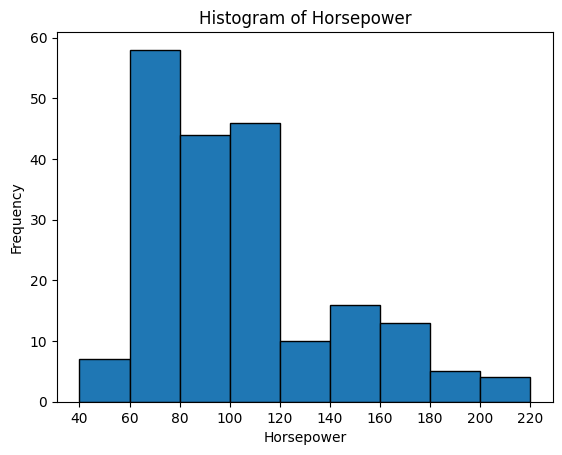

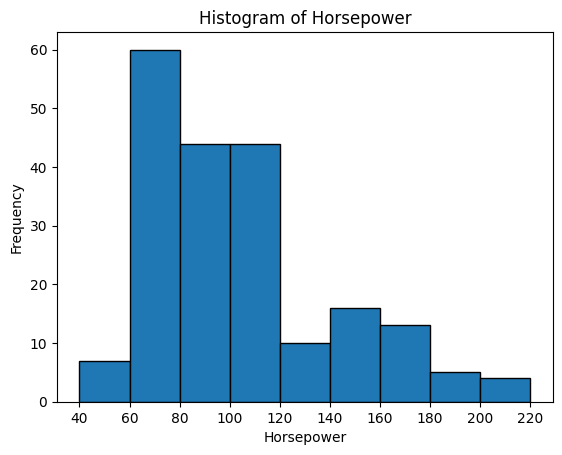

In [87]:
bins = [40, 60, 80, 100, 120, 140, 160, 180, 200, 220]

plt.hist(df['horsepower'], bins=bins, edgecolor='black')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.title('Histogram of Horsepower')
ticks = np.arange(min(bins), max(bins) + 20, 20)
plt.xticks(ticks)
plt.show()

plt.hist(npy[:, 4], bins=bins, edgecolor='black')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.title('Histogram of Horsepower')
ticks = np.arange(min(bins), max(bins) + 20, 20)
plt.xticks(ticks)
plt.show()


**4. Збудувати графік залежності одного integer/real атрибута від іншого.**

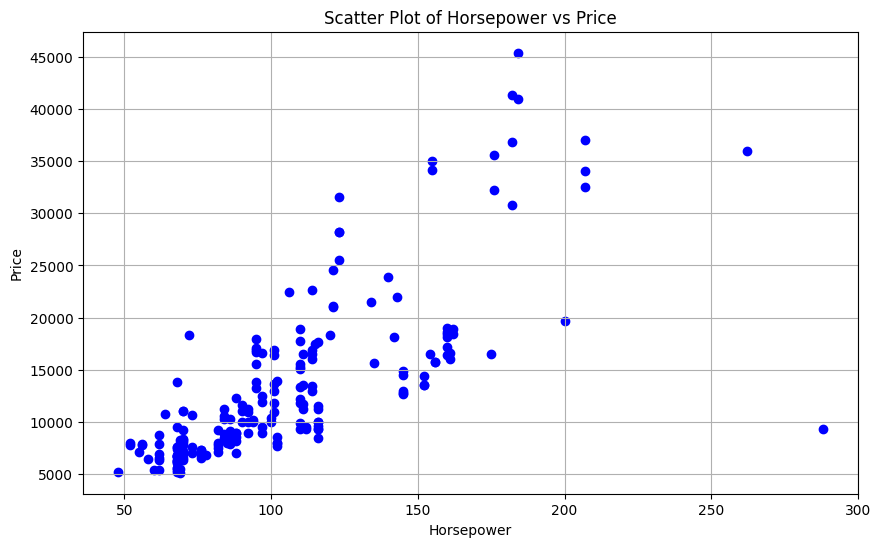

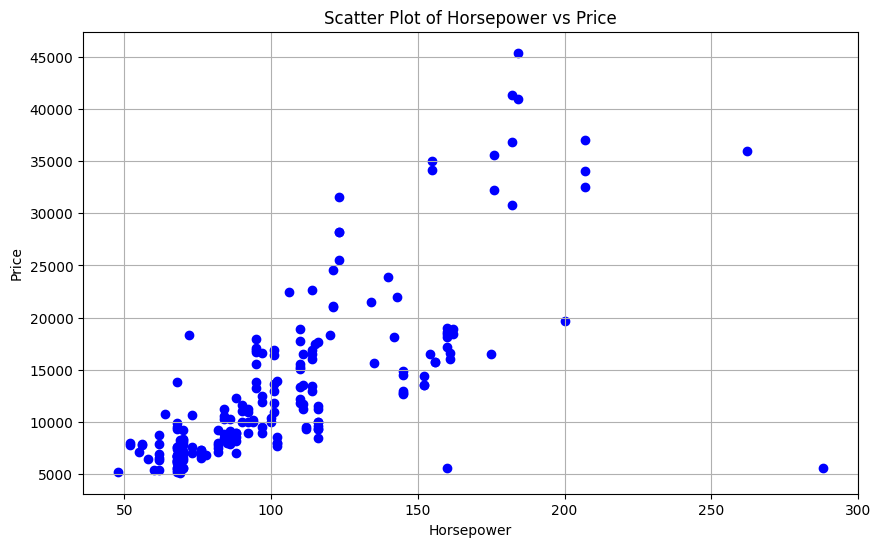

In [88]:
plt.figure(figsize=(10,6))
plt.scatter(df['horsepower'], df['price'], color='blue')
plt.title('Scatter Plot of Horsepower vs Price')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(npy[:, 4], npy[:, 0], color='blue')
plt.title('Scatter Plot of Horsepower vs Price')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.grid(True)
plt.show()

**5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.**

In [89]:
attribute1 = df['horsepower']
attribute2 = df['price']

pearson, _ = pearsonr(attribute1, attribute2)
spearman, _ = spearmanr(attribute1, attribute2)

print("DataFrame:")
print("Pearson correlation coefficient:", pearson)
print("Spearman correlation coefficient:", spearman)

attribute1 = npy[:, 4]
attribute2 = npy[:, 0]

pearson, _ = pearsonr(attribute1, attribute2)
spearman, _ = spearmanr(attribute1, attribute2)

print("\nNumPy:")
print("Pearson correlation coefficient:", pearson)
print("Spearman correlation coefficient:", spearman)


DataFrame:
Pearson correlation coefficient: 0.7499876108755954
Spearman correlation coefficient: 0.8355061206204839

NumPy:
Pearson correlation coefficient: 0.7316948782317493
Spearman correlation coefficient: 0.8007641180712181


**6. Провести One Hot Encoding категоріального string атрибуту.**

In [90]:
encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(df[['fuel-type']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns = encoder.categories_[0])
encoded_df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
print("DataFrame:\n", encoded_df[['price', 'make', 'fuel-type', 'diesel', 'gas']])

col_fuel = npy[:, 23].reshape(-1, 1)
encoded_data = encoder.fit_transform(col_fuel).toarray()
encoded_npy = np.concatenate((npy, encoded_data), axis=1)

print("\nNumPy:\n", encoded_npy)

DataFrame:
        price         make fuel-type  diesel  gas
0    13495.0  alfa-romero       gas     0.0  1.0
1    16500.0  alfa-romero       gas     0.0  1.0
2    16500.0  alfa-romero       gas     0.0  1.0
3    13950.0         audi       gas     0.0  1.0
4    17450.0         audi       gas     0.0  1.0
..       ...          ...       ...     ...  ...
200  16845.0        volvo       gas     0.0  1.0
201  19045.0        volvo       gas     0.0  1.0
202  21485.0        volvo       gas     0.0  1.0
203  22470.0        volvo    diesel     1.0  0.0
204  22625.0        volvo       gas     0.0  1.0

[205 rows x 5 columns]

NumPy:
 [[13495.0 27 21 ... 0.0 0.0 0.0]
 [16500.0 27 21 ... 0.0 0.0 0.0]
 [16500.0 26 19 ... 0.0 0.0 0.0]
 ...
 [21485.0 23 18 ... 0.0 0.0 1.0]
 [22470.0 27 26 ... 0.0 0.0 1.0]
 [22625.0 25 19 ... 0.0 0.0 1.0]]


**7. Провести візуалізацію багатовимірних даних**

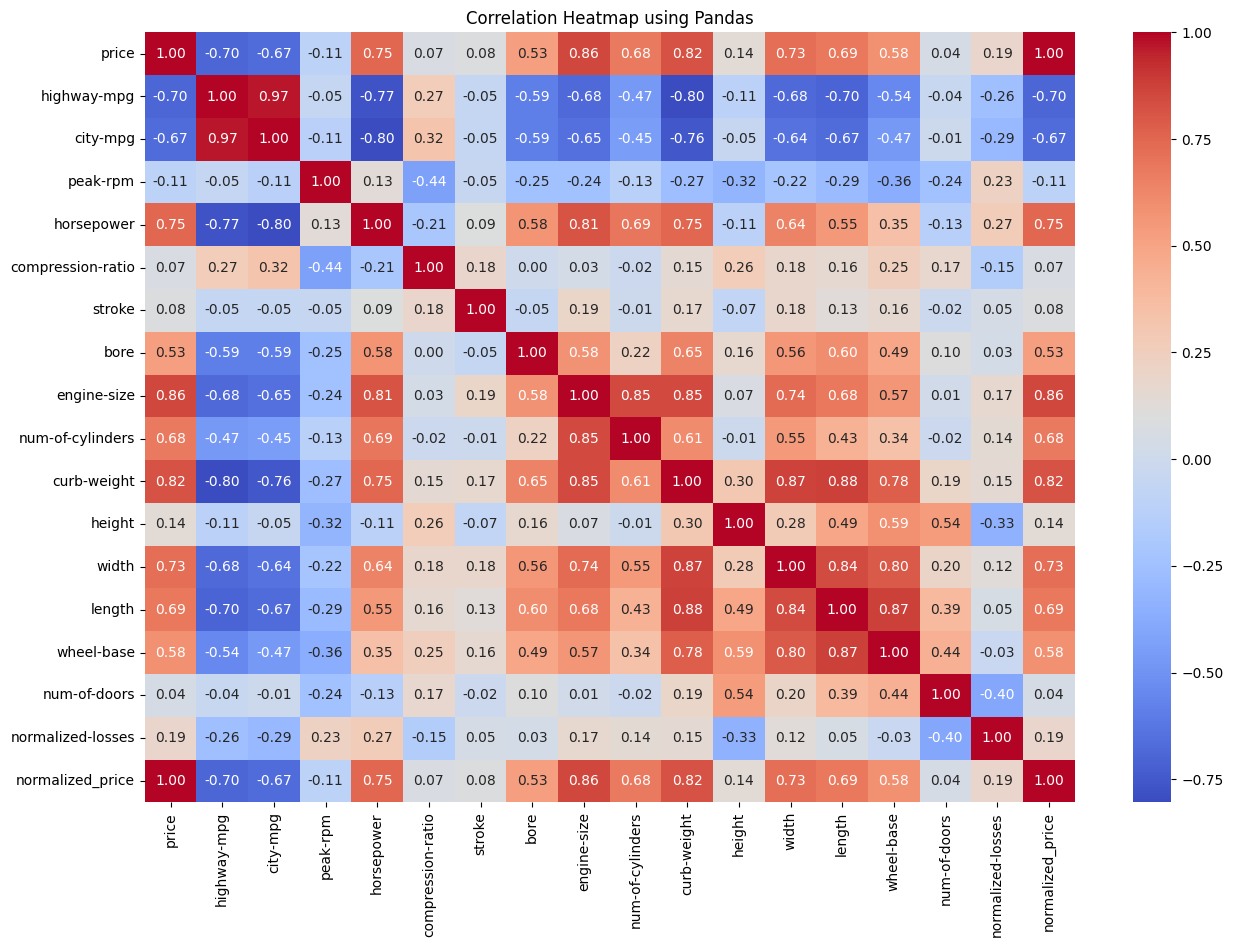

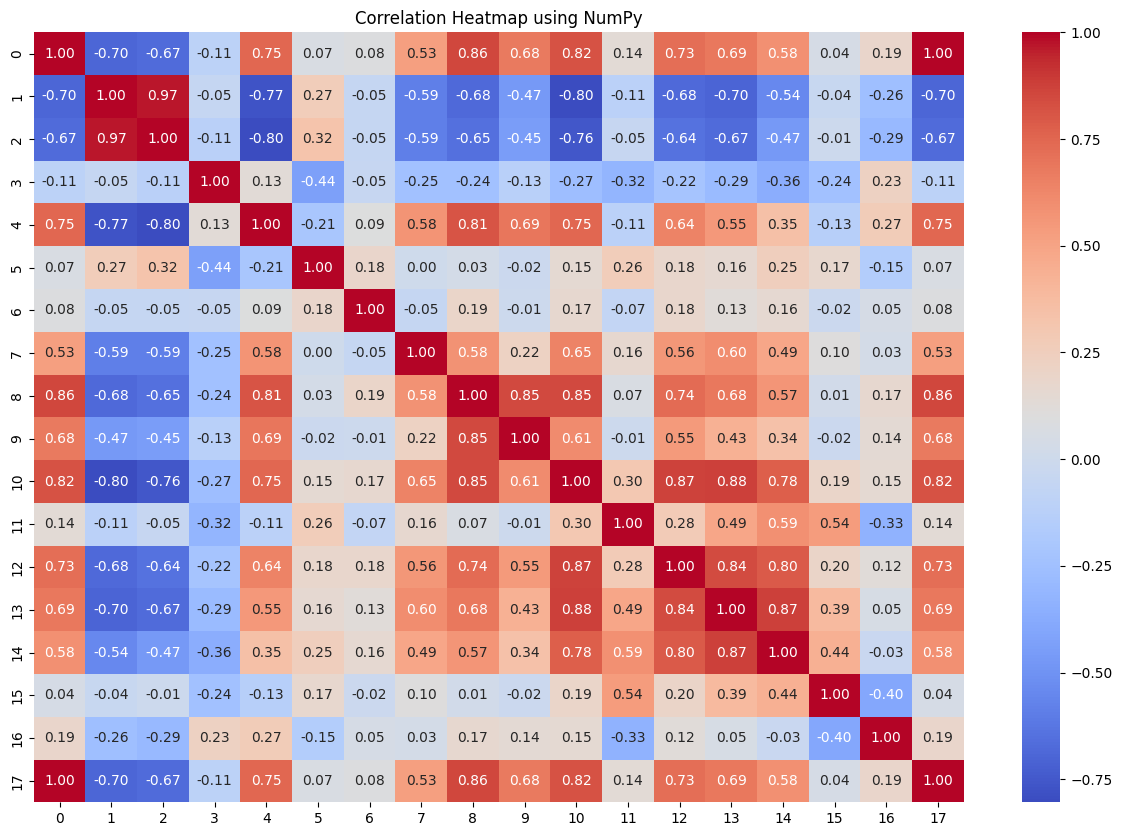

In [104]:
numeric_data = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap using Pandas')
plt.show()

numeric_data_np = numeric_data.values
corr_matrix_np = np.transpose(numeric_data_np)

heatmap = np.corrcoef(corr_matrix_np)

plt.figure(figsize=(15, 10))
sns.heatmap(heatmap, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap using NumPy')
plt.show()